### TI - ANN - BPNN
- Nama: Ramadhan Kalih Sewu
- NPM: 1806148826

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from prettytable import PrettyTable

### Activation Function
Kita menggunakan fungsi logistic yang membentuk lengkungan sigmoid dengan range 0 - 1. Fungsi ini akan mengkomputasi output yang kita gunakan sebagai penentu klasifikasi dari ANN. inputnya diambil dari jumlah weighted (beban/bobot) yang dikomputasi pada neuron ANN.

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def der_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

### Recognition Rate
Recognition rate akan menggunakan confusion matrix agar dapat menampilkan banyaknya nilai prediksi yang sesuai dengan nilai aslinya.

In [3]:
# pembulatan ke nilai terdekat kelipatan 0.5
def roundhalf(num):
    return np.round(num * 2) / 2

In [4]:
# Plot confusion matrix berdasarkan data output prediksi dan ekspektasi
import seaborn as sns
from sklearn.metrics import confusion_matrix
def PlotConfusionMatrix(title, ax, y_true, y_pred):
    
    # hitung akurasi (hitung 1-1 banyaknya kesamaan pada prediksi dan ekspektasi)
    acc = np.sum(y_pred == y_true) / len(y_true) * 100.0
    
    # ubah ke bentuk string, fungsi confusion_matrix expect sebuah nilai
    # kategorikal bukan nilai yang continous
    y_true = y_true.astype(dtype='O')
    y_pred = y_pred.astype(dtype='O')
    
    # plot dengan normalisasi
    labels = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
    cm = confusion_matrix(y_true, y_pred, normalize='pred')
    f = sns.heatmap(cm, annot=True, ax=ax, cmap='Blues',
                   xticklabels=labels, yticklabels=labels)
    
    ax.set_xlabel('Predicted labels\n Accuracy: %.4f' % acc);
    ax.set_ylabel('True labels');
    ax.set_title(title);

In [5]:
# ### Akurasi Prediksi
# Menggunakan fungsi aktivasi sigmoid untuk menghitung score atau akurasi dari prediksi gradient yang kita berikan.
# - x: input variabel dari data yang di test
# - y: output sebenarnya dari data yang di test
# - weights: gradient bobot prediksi
# - bias: gradient bias prediksi

def TestScore(x, y, weights, bias):
    res = np.dot(x, weights) + bias
    res = sigmoid(res)
    score = y - abs(y - res)
    return score.mean()

### Data Uji Coba
Kita ambil data iris pada percobaan sebelumnya dengan output (Y) sebagai species, yaitu data kategorikal. Kemudian kolom lainnya kita gunakan sebagai fitur dalam model ini.

In [6]:
import pandas as pd
datacsv = pd.read_csv('../Dataset/Iris.csv')
feature = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = datacsv[feature]
y = datacsv.Species

In [7]:
x = x.to_numpy()
y = y.to_numpy()

Cek hasil input data dengan menampilkan tabel dibawah.

In [8]:
def TabulateIris(x, y):
    t = PrettyTable(feature)
    t.add_rows(x)
    t.add_column('Species', y)
    print(t)
    
TabulateIris(x, y)

+---------------+--------------+---------------+--------------+-----------------+
| SepalLengthCm | SepalWidthCm | PetalLengthCm | PetalWidthCm |     Species     |
+---------------+--------------+---------------+--------------+-----------------+
|      5.1      |     3.5      |      1.4      |     0.2      |   Iris-setosa   |
|      4.9      |     3.0      |      1.4      |     0.2      |   Iris-setosa   |
|      4.7      |     3.2      |      1.3      |     0.2      |   Iris-setosa   |
|      4.6      |     3.1      |      1.5      |     0.2      |   Iris-setosa   |
|      5.0      |     3.6      |      1.4      |     0.2      |   Iris-setosa   |
|      5.4      |     3.9      |      1.7      |     0.4      |   Iris-setosa   |
|      4.6      |     3.4      |      1.4      |     0.3      |   Iris-setosa   |
|      5.0      |     3.4      |      1.5      |     0.2      |   Iris-setosa   |
|      4.4      |     2.9      |      1.4      |     0.2      |   Iris-setosa   |
|      4.9      

Tipe data kategorikal jika diproses dalam Neural network perlu disesuaikan agar berbentuk numerik. Salah satu cara adalah dengan Integer Encoding dimana mengubah ke suatu nilai integer. Ini mempermudah kita memproses hasil output dari neural network yang kita bangun. Cara lain adalah dengan membuat One Hot Encoding. Saya menghindari teknik ini karena ini agak rumit di-implementasi. Disini saya menggunakan 0.0, 0.5 dan 1.0 karena menyesuaikan dengan fungsi aktivasi sigmoid.

In [9]:
# y1 = [1 if i == 'Iris-setosa'     else 0 for i in yTrain]
# y2 = [1 if i == 'Iris-versicolor' else 0 for i in yTrain]
# y3 = [1 if i == 'Iris-virginica'  else 0 for i in yTrain]

Encoding = [['Iris-virginica', 0.0], ['Iris-versicolor', 0.5], ['Iris-setosa', 1.0]]

def Encode(y):
    temp = np.empty(len(y), dtype='float64')
    for i in range(len(y)):
        if   (y[i] == Encoding[0][0]):  temp[i] = Encoding[0][1]
        elif (y[i] == Encoding[1][0]):  temp[i] = Encoding[1][1]
        else:                           temp[i] = Encoding[2][1]
    return temp
            
#decoding
def Decode(y):
    temp = np.empty(len(y), dtype='O')
    for i in range(len(y)):
        if   (y[i] == Encoding[0][1]):  temp[i] = Encoding[0][0]
        elif (y[i] == Encoding[1][1]):  temp[i] = Encoding[1][0]
        else:                           temp[i] = Encoding[2][0]
    return temp

Split testing dan training data menggunakan fungsi bawaaan sklearn. Selain membagi dengan rasio 70-30, ini membantu juga mengacak data sehingga membantu proses learning mendapatkan hasil yang lebih akurat dengan menghindari overfitting.

In [10]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3)

yTrain = Encode(yTrain)
print(yTrain)

[0.  0.  0.  0.5 0.5 0.5 0.5 1.  0.5 0.  0.5 1.  1.  0.  0.5 1.  0.  0.5
 1.  1.  0.5 0.5 1.  0.5 0.5 0.5 0.5 0.  0.  1.  0.5 0.5 1.  1.  0.  0.5
 0.  1.  1.  1.  1.  0.  1.  1.  0.5 0.5 1.  1.  0.  0.  0.  0.5 1.  0.
 1.  0.  0.5 0.  1.  0.  0.  0.5 1.  1.  0.5 1.  0.  0.5 0.5 0.  0.  1.
 1.  0.5 0.  0.5 1.  0.5 0.5 0.  1.  1.  0.  0.  0.  0.5 0.5 0.5 1.  0.
 0.5 0.  1.  0.5 0.5 0.5 1.  0.  0.5 0.5 0.5 1.  0.5 0.  0.5]


### Training Parameter
Kita menentukan bias, bobot, dan learning rate untuk digunakan dalam gradient descent. Nilai dibawah dapat kita tentukan secara random dengan rentang -0.5 - 0.5. Gradient descent akan berangkat dari nilai acak berikut dan secara bertahap memperbaruinya agar sesuai dengan output pada data training.

In [11]:
learning_rate = [0.0001, 0.0005, 1]
initBias = 0.2

from random import uniform
initWeights = [uniform(-0.5, 0.5) for i in range(len(feature))]

t = PrettyTable(feature)
t.title = "Starting Gradient Value"
t.add_row(initWeights)
print(t)

+---------------------------------------------------------------------------------------+
|                                Starting Gradient Value                                |
+----------------------+---------------------+--------------------+---------------------+
|    SepalLengthCm     |     SepalWidthCm    |   PetalLengthCm    |     PetalWidthCm    |
+----------------------+---------------------+--------------------+---------------------+
| -0.37686160243009403 | 0.35693232804502784 | 0.3926852896264075 | -0.3569760103383658 |
+----------------------+---------------------+--------------------+---------------------+


In [12]:
listScore = []
listWeights = []
listBias = []

### Training the Neural Network
Dalam proses ini, kita melakukan dua buah langkah yaitu:
- Feed forward: Mendapatkan inisiasi output, proses ini terdiri dari
  - (1) Membuat Input Layer
  - (2) Menambah Bobot dan Bias
  - (3) Menambah Output Layer
  - (4) Hitung Kalkulasi Bobot dari Input
  - (5) Prediksi output dengan Fungsi Aktivasi
- Back propagation: Proses memperbarui bobot agar memperkecil error
  - (1) Hitung error
  - (2) Gunakan algoritma gradient descent
  - (3) Perbarui bobot
  - (4) Perbarui bias
  - (5) Lakukan sebanyak n untuk meningkatkan akurasi

In [13]:
# n atau banyaknya iterasi untuk gradient descent
for lrate in learning_rate:
    epochs = 500
    score = []
    weights = initWeights
    bias = initBias
    for epoch in range(epochs):

        # menggunakan dot product untuk menghitung kalkulasi bobot
        wSum = np.dot(xTrain, weights) + bias
        res = sigmoid(wSum)

        # hitung error dari prediksi menggunakan fungsi aktivasi
        err = res - yTrain
        errSum = np.square(err).mean()

        # metode gradient descent untuk memperkecil error
        der1 = err
        der2 = der_sigmoid(res)
        derivative = der1 * der2

        transposed_x = xTrain.T
        final_derivative = np.dot(transposed_x, derivative)

        # perbarui weights dan bias berdasarkan turunan fungsi sigmoid
        weights = weights - lrate * final_derivative
        
        for i in derivative:
            bias = bias - lrate * i

        # prediksi dengan fungsi aktivasi dan hitung score nya
        score.append(TestScore(xTrain, yTrain, weights, bias))
    
    # simpan kalkulasi tiap learning rate yang dicoba
    listScore.append(score)
    listBias.append(bias)
    listWeights.append(weights)

<ipython-input-2-e247268f79c5>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


### Result
Gradient hasil komputasi pada learning dapat digunakan sebagai formula untuk menghasilkan prediksi yang kita inginkan. Berikut adalah hasil weights dan bias pada epoch terakhir (500) yang umumnya merupakan gradient terbaik yang fit ke model training.

In [14]:
t = PrettyTable()
t.title = "Gradient Computed in Learning"
t.add_column("Learning Rate", learning_rate)
t.add_column("Weights", listWeights)
t.add_column("Bias", listBias)
print(t)

+------------------------------------------------------------------------------------------------+
|                                 Gradient Computed in Learning                                  |
+---------------+-----------------------------------------------------------+--------------------+
| Learning Rate |                          Weights                          |        Bias        |
+---------------+-----------------------------------------------------------+--------------------+
|     0.0001    |     [-0.27209717  0.57979755  0.01689932 -0.55228381]     | 0.2584411494326678 |
|     0.0005    |     [-0.02004629  0.91895776 -0.50620967 -0.87034043]     | 0.3702718540715241 |
|       1       | [ 122.56900555  118.3250806  -167.3105264  -178.79156247] | 75.51815828403107  |
+---------------+-----------------------------------------------------------+--------------------+


Learning rate tentunya akan menentukan seberapa cepat proses learning kita. Dapat dilihat semakin kecil learning rate maka proses pembelajaran akan lebih lamban. Pada dasarnya initial weight yang kita berikan akan membentuk sebuah graf yang modelnya 'sama' regardless learning rate yang kita berikan. Sehingga semakin kecil learning rate akan semakin akurat, tetapi akan membutuhkan epochs yang lebih besar.
- Waspada bahwa learning rate terlalu tinggi dapat menghasilkan overshoot.

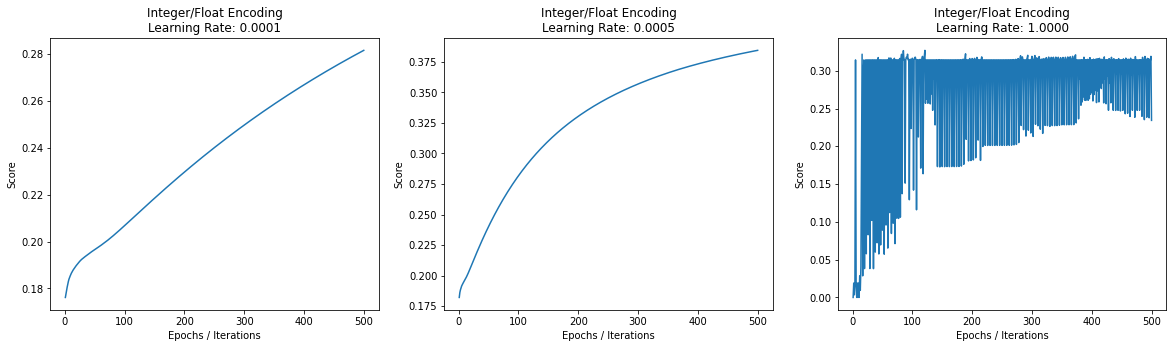

In [15]:
xPoint = np.arange(1, epochs+1)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
for i, ax in zip(range(len(listScore)), axes.flatten()):
    ax.plot(xPoint, listScore[i])
    ax.set_title('Integer/Float Encoding\nLearning Rate: %.4f' % learning_rate[i])
    ax.set_xlabel("Epochs / Iterations")
    ax.set_ylabel("Score")
plt.show()

Akurasi yang ditunjukkan diatas berdasarkan rata-rata error dari seluruh data testing setiap iterasi. Error dihitung dari selisih tebakan fungsi aktivasi dengan nilai integer/float encoding yang kita definisikan sebelumnya. Tentunya ini sangat susah untuk mendapat akurasi tinggi, bayangkan saja skenario berikut:

- prediksi = 0.38, real = 0.5, prediksi dibulatkan = 0.5
- prediksi = 0.35, real = 0.5, prediksi dibulatkan = 0.5
- prediksi = 0.95, real = 0.0, prediksi dibulatkan = 1.0
- prediksi = 0.80, real = 1.0, prediksi dibulatkan = 1.0

jika dirata-ratakan, skenario diatas memiliki error ~= 35% padahal jika menggunakan pembulatan seharusnya error yang dihasilkan lebih rendah yaitu 25%. dibawah adalah contoh menggunakan fungsi predict() yang akan membulatkan hasil prediksi

### Prediksi
menggunakan x sebagai input yang dikalkulasi dengan gradient weights dan bias. kemudian menggunakan fungsi aktivasi untuk menebak klasifikasi mulai dari range 0-1. Dilakukan pembulatan ke 0.5 terdekat. Kemudian hasilnya di decode kembali ke bentuk semula yaitu string.

In [16]:
# prediksi akan menebak nilai yang diberikan oleh x menggunakan gradient
# nilai akan dibulatkan kepada 0.5 terdekat
# ini untuk menentukan kategori dimana:
# 0.0 virginica, 0.5 = versicolor, 1 = setosa
def predict(x, weights, bias):
    pred = np.dot(x, weights) + bias
    res = sigmoid(pred)
    res = roundhalf(res)
    return Decode(res)

In [17]:
# fungsi akan memprediksi output (ypred) dengan input x
# menggunakan weights dan bias yang telah dikalkulasi sebelumnya

def PlotRecognition(x, y):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
    for i, ax in zip(range(len(listScore)), axes.flatten()):
        title = 'Confusion Matrix\nLearning Rate: %.4f' % learning_rate[i]
        yPred = predict(x, listWeights[i], listBias[i])
        PlotConfusionMatrix(title, ax, y, yPred)
    plt.show()

def TabulateRecognition(x, y, weights, bias):
    yPred = predict(x, weights, bias)
    t = PrettyTable()
    t.title = 'Training Recognition'
    t.add_column('Prediciton', yPred)
    t.add_column('Actual', y)
    t.sortby = 'Actual'
    print(t)

### Recognition Rate dari Data Training

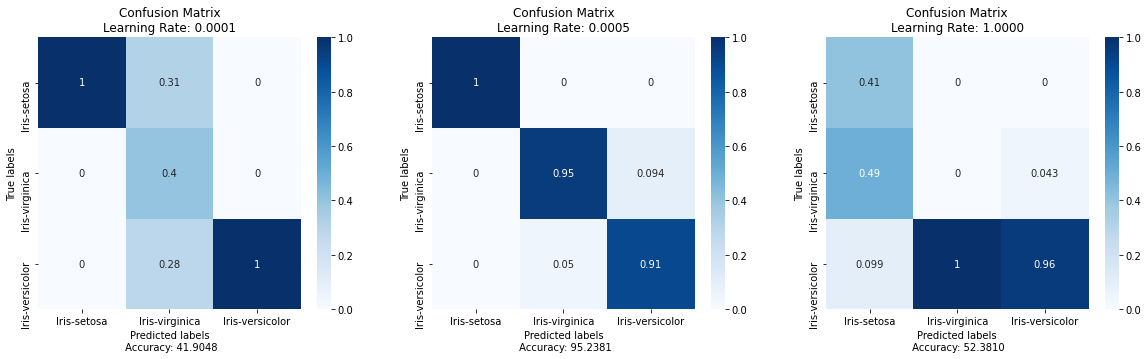

In [18]:
yTrain = Decode(yTrain)
PlotRecognition(xTrain, yTrain)

In [19]:
TabulateRecognition(xTrain, yTrain, listWeights[1], listBias[1])

+-----------------------------------+
|        Training Recognition       |
+-----------------+-----------------+
|    Prediciton   |      Actual     |
+-----------------+-----------------+
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-set

### Recognition Rate dari Data Testing

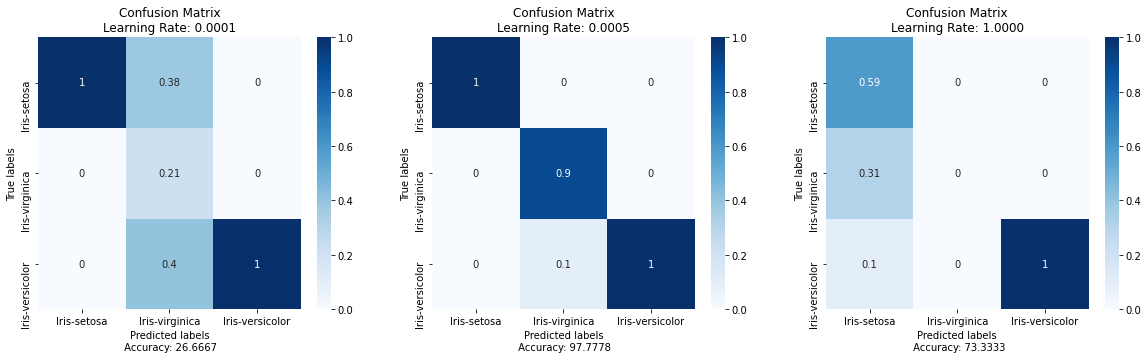

In [20]:
PlotRecognition(xTest, yTest)

In [21]:
TabulateRecognition(xTest, yTest, listWeights[1], listBias[1])

+-----------------------------------+
|        Training Recognition       |
+-----------------+-----------------+
|    Prediciton   |      Actual     |
+-----------------+-----------------+
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
|   Iris-setosa   |   Iris-setosa   |
| Iris-versicolor | Iris-versicolor |
| Iris-versicolor | Iris-versicolor |
| Iris-versicolor | Iris-versicolor |
| Iris-versicolor | Iris-versicolor |
| Iris-versi

### Kesimpulan
- Dengan Epochs 500, learning rate 0.0001 terlalu lama dalam mempelajari model. Ini dapat kita lihat dari perbandingan akurasi dengan learning rate yang lebih tinggi. Kita dapat simpulkan juga dari graf, bahwa learning rate 0.0001 masih memendam potensi untuk meningkatkan akurasi seandainya diberi lebih banyak epochs atau iterasi untuk learning.
- Learning rate 0.0005 adalah sweetspot untuk skenario data iris dengan epochs 500. Model berhasil belajar secara konsisten. Dilihat dari graf, proses learning sudah mendekati puncak dari akurasi tertinggi karena kenaikan akurasi tiap epoch sudah sangat minim. 
- Learning Rate 1.0 terlalu tinggi sehingga menghasilkan overshoot. Ini berdampak pada akurasi data yang kurang akurat.
- Data yang diambil dari percobaan diatas adalah local minimum karena kita berangkat pada satu nilai inisial
- Karena nilai inisial di random, setiap kali notebook dijalankan dapat menghasilkan akurasi yang berbeda.

#### Referensi:
https://www.youtube.com/watch?v=9UBqkUJVP4g